In [101]:
import os
import numpy as np
from tqdm import tqdm

In [129]:
labels_dict = {
    0 : "unlabeled",
    1 : "outlier",
    10: "car",
    11: "bicycle",
    13: "bus",
    15: "motorcycle",
    16: "on-rails",
    18: "truck",
    20: "other-vehicle",
    30: "person",
    31: "bicyclist",
    32: "motorcyclist",
    40: "road",
    44: "parking",
    48: "sidewalk",
    49: "other-ground",
    50: "building",
    51: "fence",
    52: "other-structure",
    60: "lane-marking",
    70: "vegetation",
    71: "trunk",
    72: "terrain",
    80: "pole",
    81: "traffic-sign",
    99: "other-object",
    252: "moving-car",
    253: "moving-bicyclist",
    254: "moving-person",
    255: "moving-motorcyclist",
    256: "moving-on-rails",
    257: "moving-bus",
    258: "moving-truck",
    259: "moving-other-vehicle"
}

labels_to_idx = {list(labels_dict.keys())[i]:i for i in range(len(labels_dict))}

In [130]:
sequence = '08'
path = 'data/sequences/{}/velodyne/'.format(sequence)
label_path = 'data/sequences/{}/labels/{}label'
preds_path = 'output/sequences/{}/predictions/{}label'

to_plot = np.zeros((100*5, len(labels_dict)))
total   = np.zeros((100*5, len(labels_dict)))
for cloud_name in tqdm(os.listdir(path)):
    cloud  = np.fromfile(path+cloud_name, dtype=np.float32).reshape(-1,4)[:,:3]
    labels = np.fromfile(label_path.format(sequence, cloud_name[:-3]), dtype=np.int32).reshape(-1,1)
    labels = labels & 0xFFFF
    preds  = np.fromfile(preds_path.format(sequence, cloud_name[:-3]), dtype=np.int32).reshape(-1,1)
    preds  = preds & 0xFFFF
    dist = np.floor(np.sqrt(np.sum(cloud**2, axis=1)) * 5).astype(np.int32)
        
    for i, v in enumerate(dist):
        if labels[i] != preds[i]:
            to_plot[v,labels_to_idx[int(labels[i])]] += 1
        total[v,labels_to_idx[int(labels[i])]] += 1

100%|██████████████████████████████████████████████████████████████████████████████| 4071/4071 [18:05<00:00,  3.75it/s]


In [131]:
to_plot = to_plot[:250,:]
total = total[:250,:]

C:\Users\alexi\anaconda3\envs\inf573\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


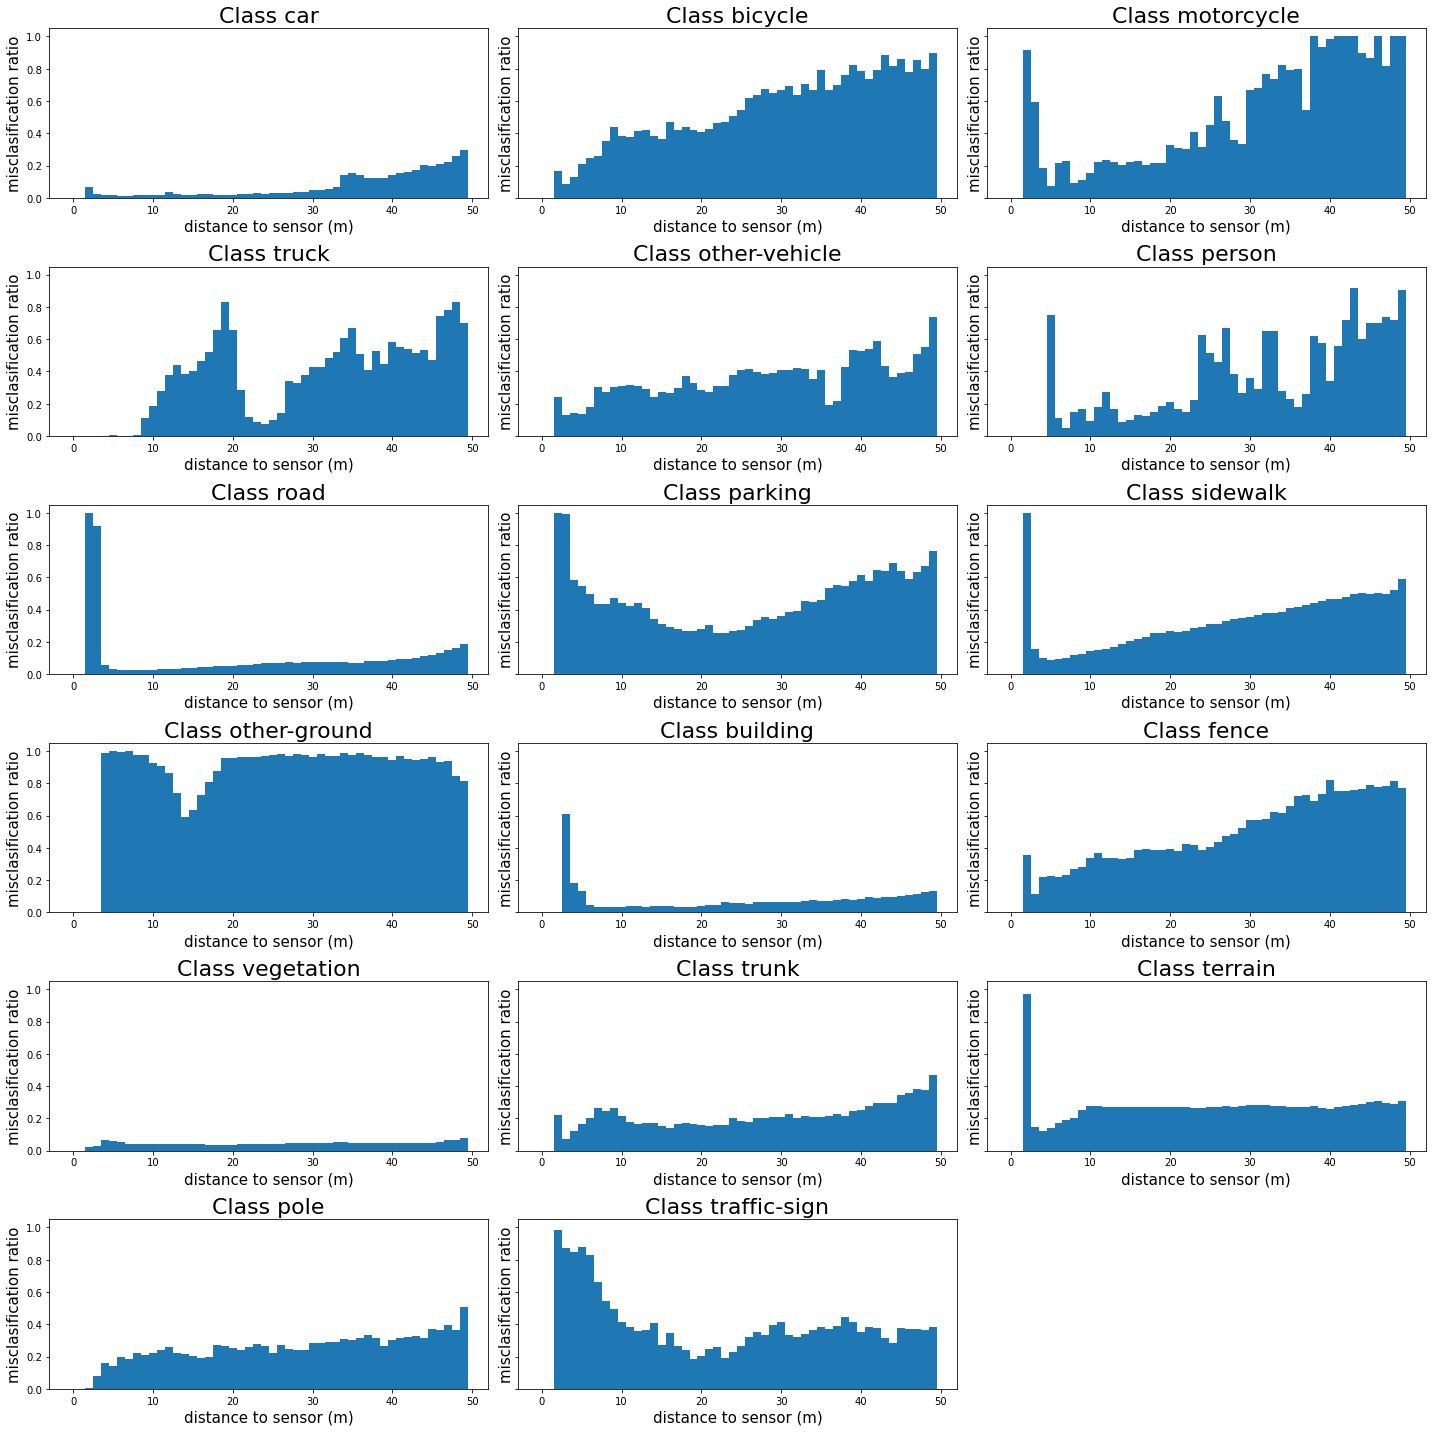

In [192]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=6,ncols=3, sharey=True, figsize=(20,20))
group=5
count=0
for label_idx, label in enumerate(labels_dict.values()):
    to_plot_grouped = np.sum(to_plot[:,label_idx].reshape(-1,group), axis=1)
    total_grouped = np.sum(total[:,label_idx].reshape(-1,group), axis=1)
    relative = np.nan_to_num(to_plot_grouped/total_grouped)
    num_points = int(total[:,label_idx].sum())
    if num_points<5000 or (relative[10:]==1.).all():
        continue
    ax[count//3,count%3].bar([i*.2*group for i in range(to_plot_grouped.shape[0])],relative, width=.2*group)
    ax[count//3,count%3].set_title('Class {}'.format(label), size=22)
    ax[count//3,count%3].set_xlabel('distance to sensor (m)',size=15)
    ax[count//3,count%3].set_ylabel('misclasification ratio',size=15)
    count += 1
ax[5,2].axis('off')
fig.tight_layout()
plt.show()